In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib as mplPorterStemmer


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenhu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
review = pd.read_csv('review.csv')

In [3]:
review = review[review['text'].isnull()==False]

In [4]:
review.head()

,business_id,date,review_id,stars,text,useful,user_id,coolfun
0,O-fYUqXjkwNvRfFnlUH6Iw,2018,RThSyUZ1myb0-Nmjr8BFIw,2.0,"Wonderful cookies, but don't order delivery. T...",0,RnkKHzIl3LVee_Q6zooQMQ,0
1,TBnB4iIU0pVKkAzN4T8xNg,2016,Xaa4EpeOb8_U-DxaFVnSnQ,5.0,"Wow! So fresh, ripe, and sweet! And right in m...",0,0EVRg-vTwGwIsXNzZ_CORQ,0
2,_lpqjZAseSvoDxPN-_JnzQ,2017,-bmjCY2ItbLszta-4otAoA,5.0,Great location; convenient to the light rail a...,0,dLYgi5MavKXhE62Sshd5Zg,0
3,8REOSFVMO-E1VrmLvY49Tg,2018,M2hQtEA6us3euOudiWdOSQ,3.0,Ice cream is ok. To Pricey. Bought two cone...,0,zGHuQJjzDOy2iz5ZJwWfCg,0
4,GhOWffUr9yDBxB5Ceqzc_Q,2011,tTE48wqGP0LyEsnwCdiJWw,2.0,the ice cream is great but the owner is very r...,2,ji76ZP3X7OIQlx2MvN1tWg,4


In [6]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

fullversiondict={"ain't": "is not", "aren't": "are not","can't": "cannot",
                 "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                 "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                 "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you",
                 "how'll": "how will","how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                 "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                 "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                 "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                 "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                 "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                 "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not","shouldn't've": "should not have", 
                 "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have",
                 "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                 "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                 "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                 "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
                 "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
                 "you're": "you are", "you've": "you have", 'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 
                 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do',
                 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018',
                 'qouta': 'quota','exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

full_re = re.compile('(%s)'%'|'.join(fullversiondict.keys()))
def replacetext(text):
    def replace(match): 
        return fullversiondict[match.group(0)]
    return full_re.sub(replace,text) # The full.re here is match, can replace any string now

In [9]:
# STOPWORDS
stemmer = nltk.stem.SnowballStemmer('english')
STOPWORDS = set(stopwords.words('english')) - {'aren', "aren't",'couldn',"couldn't",'didn',"didn't",'doesn',
                                              "doesn't",'don',"don't",'hadn',"hadn't",'hasn',"hasn't","haven",
                                              "haven't",'isn',"isn't",'mightn',"mightn't","mustn","mustn't",
                                              'needn',"needn't","no",'nor','not','shan',"shan't",'shouldn',
                                              "shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",
                                              "wouldn","wouldn't"} 
print(STOPWORDS)

{'out', 'then', 'during', 'did', 're', 'is', 'down', 'to', 'too', 'only', 've', 'while', 'than', 'yourselves', 'through', 'same', 'll', 'do', 'that', 'because', 'itself', "should've", "you're", 'ma', 'until', 'you', 'but', 'few', 'against', 'her', 'on', 'i', 'had', 'its', 'when', 'been', 'my', 'and', 'at', 'their', 'after', "you'll", 'm', 'between', 'are', 'were', 'she', 'once', 'up', 'these', "you'd", 'was', 'having', 's', 'being', 'if', 'from', 'own', 'where', 'ours', 'o', 'before', 'your', 'we', 'whom', 'or', 'other', 'yours', 'how', 'just', 'an', 'under', 'both', 'as', 'does', 'more', 'herself', 'so', 'it', 'what', 'why', 'them', 'about', 'each', 'over', 'above', 'me', 'of', 'our', 'in', 'all', "that'll", 'by', 'again', 'who', 'ourselves', 'd', 'can', 'some', 'him', 'any', 'this', 'am', "you've", 'hers', 'which', 'his', 'theirs', 'have', 'into', 'y', 'he', 'a', 'with', 'will', 'they', 'there', 'doing', 'most', 'should', 'for', 'be', "it's", 'now', "she's", 'has', 't', 'those', 'bel

In [10]:
def cleanup(x):
    x = str(x).lower() # to lowercase
    x = replacetext(x) # abbreviation to full
    for punct in puncts: # punctions
        if punct in x:
            x=x.replace(punct,' ')
    words = [word for word in x.split() if word not in STOPWORDS] # Remove stopwords
    
    space = ''
    for word in words:
        space = space + ' ' + word
    return space

In [13]:
review['text_clean'] = review['text'].apply(cleanup)

In [12]:
review.head()

,business_id,date,review_id,stars,text,useful,user_id,coolfun,text_clean
0,O-fYUqXjkwNvRfFnlUH6Iw,2018,RThSyUZ1myb0-Nmjr8BFIw,2.0,"Wonderful cookies, but don't order delivery. T...",0,RnkKHzIl3LVee_Q6zooQMQ,0,wonderful cookies not order delivery took alm...
1,TBnB4iIU0pVKkAzN4T8xNg,2016,Xaa4EpeOb8_U-DxaFVnSnQ,5.0,"Wow! So fresh, ripe, and sweet! And right in m...",0,0EVRg-vTwGwIsXNzZ_CORQ,0,wow fresh ripe sweet right back yard watched ...
2,_lpqjZAseSvoDxPN-_JnzQ,2017,-bmjCY2ItbLszta-4otAoA,5.0,Great location; convenient to the light rail a...,0,dLYgi5MavKXhE62Sshd5Zg,0,great location convenient light rail apartmen...
3,8REOSFVMO-E1VrmLvY49Tg,2018,M2hQtEA6us3euOudiWdOSQ,3.0,Ice cream is ok. To Pricey. Bought two cone...,0,zGHuQJjzDOy2iz5ZJwWfCg,0,ice cream ok pricey bought two cones charged ...
4,GhOWffUr9yDBxB5Ceqzc_Q,2011,tTE48wqGP0LyEsnwCdiJWw,2.0,the ice cream is great but the owner is very r...,2,ji76ZP3X7OIQlx2MvN1tWg,4,ice cream great owner rude everytime go alway...


In [14]:
review['text'][50]

'Best icecream ever!\nWould definitely recommend this to everyone.\n\nThey got tons of unique ice cream flavors.\n\nMy favorite is their grasshopper mint!'

In [15]:
review['text_clean'][50]

' best icecream ever would definitely recommend everyone got tons unique ice cream flavors favorite grasshopper mint'

In [19]:
star1=review[review['stars']==1.0] 
star1.head()

,business_id,date,review_id,stars,text,useful,user_id,coolfun,text_clean
12,-Pd-IBDWWwRNWzBBFTb7iQ,2017,PwB9Y4j9oAXGJsQOLe2uxA,1.0,"Worse experience ever! Got in there, no one ca...",0,C4i8p4oOTe5SDRL9zI41zQ,0,worse experience ever got no one came counter...
33,5VXxZIMgoKRWbNa6x9kMfw,2016,difT_M0cfkhCHud7DC5jxA,1.0,Great ice cream but LITERALLY THE WORST SERVIC...,0,7j_ZlAFIe-gLLVwYUPVMhA,0,great ice cream literally worst service ever ...
46,q2YXBzJ2S6jM8pbC23f83Q,2013,b9s9jvSdzalx7LGWRO4CVA,1.0,"$7.59 for an unsatisfying, not thick chocolate...",14,7J6Hb7VuTsJq50iiNwqvCg,21,7 59 unsatisfying not thick chocolate milksha...
49,64h5mGa2cJqLgoEwRfpDUQ,2015,s8txf6kEH8TMTSgky72-uQ,1.0,"The ice cream is good, but the service is poor...",0,NLvPJdWUFGR1uGm9o9bjqQ,0,ice cream good service poor guy counter not t...
70,Wlg9fruyWcoW3VuPuRDcpA,2015,cxm347GCexUsDU_LhPheZA,1.0,Ice cream was okay. Loud rap music blasting w...,1,APcgdkidzc84mw9z-yGokg,0,ice cream okay loud rap music blasting lyrics...


In [17]:
ice = pd.read_csv('ice.csv')

In [18]:
ice.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,7800 Fairview Rd,"{'WiFi': ""'no'"", 'BusinessAcceptsCreditCards':...",nwxF9EKLOCpkScMF2utHDw,"Ice Cream & Frozen Yogurt, Food, Event Plannin...",Charlotte,"{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",1,35.147358,-80.809568,Ben & Jerry's,28226.0,19,3.5,NC
1,115 Meyran Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",O-fYUqXjkwNvRfFnlUH6Iw,"Bakeries, Event Planning & Services, Caterers,...",Pittsburgh,"{'Monday': '9:0-3:0', 'Tuesday': '9:0-3:0', 'W...",1,40.440959,-79.958608,Insomnia Cookies,15213.0,18,3.0,PA
2,2362 Professor Ave,"{'BusinessParking': ""{'garage': False, 'street...",GhOWffUr9yDBxB5Ceqzc_Q,"Food, Ice Cream & Frozen Yogurt",Cleveland,"{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",1,41.480032,-81.685488,Tremont Scoops,44113.0,89,4.0,OH
3,10965 Lavender Hill Dr,"{'BikeParking': 'True', 'WiFi': ""u'no'"", 'Busi...",I8T4Xsp3Wv7W-RJhsHrTDA,"Ice Cream & Frozen Yogurt, Food",Las Vegas,"{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",1,36.144869,-115.333094,Menchie's Frozen Yogurt,89135.0,49,3.5,NV
4,4845 S Fort Apache Rd,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...",iX2c4IzH_L5F6FM5GD3SUQ,"Restaurants, Desserts, Food, Juice Bars & Smoo...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1,36.101690,-115.298150,Tasty Crepes,89147.0,260,4.5,NV


In [19]:
len(ice)

479

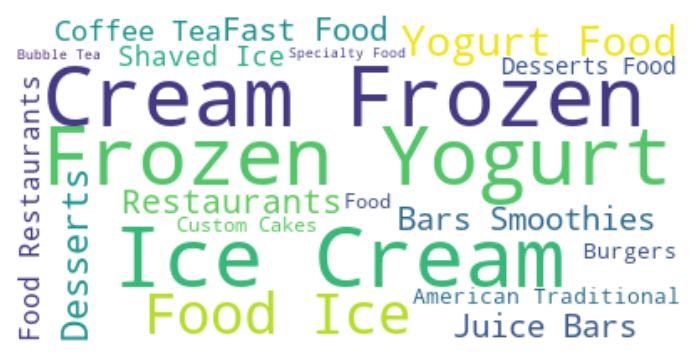

In [20]:
from os import path 
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt


text = ' '.join(ice['categories']) 

wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 词频

In [21]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(list(review['text_clean']))

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: F

In [25]:
tokenizer.texts_to_sequences(review['text_clean'])

[[398, 112, 1, 28, 157, 261, 77, 526, 336, 25],
 [520,
  56,
  30,
  71,
  13,
  247,
  14,
  73,
  46,
  437,
  945,
  26,
  132,
  18,
  382,
  78,
  84,
  41,
  13,
  18,
  115,
  294],
 [7, 46, 912, 355, 711, 21, 83, 57, 13, 12],
 [2,
  3,
  265,
  514,
  747,
  59,
  353,
  419,
  777,
  137,
  9,
  139,
  36,
  164,
  11,
  122,
  7,
  12,
  532,
  175],
 [2,
  3,
  7,
  214,
  426,
  14,
  26,
  80,
  426,
  95,
  2,
  3,
  507,
  67,
  159,
  214,
  507,
  25,
  159],
 [19, 936, 19, 21, 701, 5, 62, 84, 18, 12],
 [91,
  10,
  36,
  22,
  188,
  106,
  275,
  9,
  329,
  913,
  386,
  383,
  48,
  6,
  556,
  245,
  149,
  166,
  61,
  5,
  133,
  518,
  357,
  486,
  117,
  422,
  166],
 [246, 24, 937, 1, 114, 124, 12, 77, 345, 44, 688, 747, 669, 424, 650],
 [4,
  33,
  67,
  159,
  60,
  2,
  3,
  124,
  14,
  9,
  2,
  3,
  215,
  261,
  931,
  789,
  215,
  124,
  255,
  965,
  19,
  233,
  922,
  360,
  184,
  322,
  492,
  573,
  67,
  150,
  1,
  73,
  5,
  42,
  1,
  175,

In [2]:
tokenizer.word_index

NameError: name 'tokenizer' is not defined

In [31]:
from nltk.tokenize import word_tokenize
word_tokenize(review['text_clean'])

TypeError: expected string or bytes-like object

In [26]:
top_N = 20
word_dist = nltk.FreqDist(''.join(review['text_clean'].str.split()))
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])

TypeError: sequence item 0: expected str instance, list found

In [37]:
rslt

,Word,Frequency
0,,2209936
1,e,1567608
2,a,914917
3,o,900641
4,t,873989
5,i,787467
6,r,771510
7,s,765788
8,n,728562
9,l,660928


In [23]:
review_split = review['text_clean'].str.split()
review_words = review_split.str.join(sep=',')

In [3]:
review_words

NameError: name 'review_words' is not defined